# Homework 1 (Programming Assignment)
You have been provided with a data file in Blackboard named "<font color=red>**Toy_Dataset.csv**</font>". Please, use the dataset and try the perform the following operations

1. Import Data File (25%)
2. Estimate the Regression Co-efficient (25%)
3. Calculate the Confidence and Prediction intervals  for "Intercept" and "Slop" (25%)
4. Plotting the data, regression Line, CI and PI (Use, alpha = 0.025) (25%)

**Bonus (5%):**
Plot residuals and Probability plot of Residuals

**Note:**

Please, don't use any pre-build packages to perform the following. Build your own functions as shown in the class to complete the homework.

In [74]:
# Ernesto Hernandez-Hinojosa RJI284
#Import Libraries
# import necessary library
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
# inline plotting in jupyter notebook
%matplotlib inline

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

Number of Observations: 200
Number of Variables: 2


Text(0, 0.5, 'y')

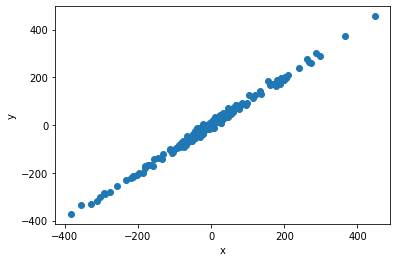

In [75]:
# Import Data Files (25%)
# Read the dataset provided in Blackboard for Toys
Data = np.genfromtxt("Toy_Dataset.csv", delimiter=",", skip_header = 1) # Doesn't read the header
# Check the Size of the data set
print('Number of Observations:', Data.shape[0])
print('Number of Variables:', Data.shape[1])
# Define the Predictor and target values
x = Data[:, 0]            # X
#x /= np.max(x)                           # Normalize the Data

#x = np.hstack((np.ones_like(x), x))      # To stack intercept column
y = Data[:, 1]                          # Y
# Check the data
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')









In [76]:
# Estimate the regression Co-efficients (25%)
# Slop and Intercept Calculator
def linear_Fit(x,y):
    # Let's compute teh slop
    m = (len(x) * np.sum(x * y) - (np.sum(x) * np.sum(y))) / (len(x) * np.sum(x ** 2) - np.sum(x) ** 2)
    # Compute the intercept
    b = (np.sum(y) - m * np.sum(x)) / len(x)
    return m, b
# Prediction Model
def Linear_Pred(x, m, b):
    y_pred = m * x + b
    return y_pred



# Calculation
m, b = linear_Fit(x,y)
y_pred = Linear_Pred(x, m, b)

print('The slope is: ')
print(m)
print('The intercept is: ')
print(b)

The slope is: 
0.998523471299359
The intercept is: 
0.9697292706130759


In [77]:
# Calculate the Confidence Interval for "Intercept" and "Slop" (25%)

  # Total sum of squares



#x_se = scipy.stats.sem(x, axis=None, ddof=0)
#y_se = scipy.stats.sem(y, axis=None, ddof=0)
#print(x_se)
#print(y_se)Error_TSS = 0
def Errors(x,y):
    x_mean = np.mean(x)
    Error_TSSS=0
    for i in range(len(x)):
        e = (x[i] - x_mean)**2
        Error_TSSS += e
    


    Error_RSSS = 0
    for i in range(len(x)):
        y_pred = Linear_Pred(x[i], m, b)
        e = (y_pred - y[i])**2
        Error_RSSS += e

    return(Error_TSSS, Error_RSSS)

In [81]:
dof = len(xx)-2
#print(dof)

Error_TSSS, Error_RSSS =Errors(x,y)

var_E = Error_RSSS/dof
#print('the variance of E is: ')
#print(var_E)

SE_slope = np.sqrt(var_E/(Error_TSSS))
#print('The standard error of the slope is: ')
#print(SE_slope)

#print('Error TSSS')
#print(Error_TSSS)

#print('Error RSSS')
#print(Error_RSSS)
x_mean=np.mean(x)
#print(x_mean)
SE_int = np.sqrt(var_E*((1/dof)+((x_mean**2)/Error_TSSS)))
#print('The standard error of the intercept is: ')
#print(SE_int)

print('The confidence interval of the slope is ')
print(m-2*SE_slope, ' to ',m+2*SE_slope)


print('the confidence interval of the intercept is: ')
print(b-2*SE_int, ' to ',b+2*SE_int)


#steyx=(Error_RSSS/(dof))**0.5
#print('The standard error of y given x is: ', steyx)
#assume tcritical = 2

se_int=np.sqrt(var_E*(1+(1/dof)+((x_mean**2)/Error_TSSS)))
pi_intLOW = b-(2*se_int)
pi_intHIGH=b+(2*se_int)

se_slope = (1+(var_E/(Error_TSSS)))**.5
pi_slopeLOW = m-(2*se_slope)
pi_slopeHIGH=m+(2*se_slope)

print('The prediction interval of the slope is: ')
print(pi_slopeLOW,' to ',pi_slopeHIGH)
print('The prediction interval of the intercept is: ' )
print(pi_intLOW,' to ', pi_intHIGH)



The confidence interval of the slope is 
0.9877576019488877  to  1.0092893406498304
the confidence interval of the intercept is: 
-0.42068657886818983  to  2.3601451200943417
The prediction interval of the slope is: 
-1.00150550447646  to  2.9985524470751783
The prediction interval of the intercept is: 
-18.642444459726935  to  20.581903000953087


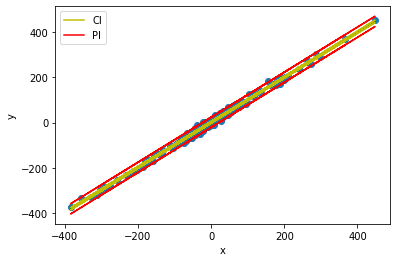

In [84]:
# Plotting the data, regression Line, CI and PI (25%)
tval = 2.258 #for alpha of .025 (two-tailed)
pylab.scatter(xx,y)
pylab.xlabel('x')
pylab.ylabel('y')

# Prediction Model
#assume t value of 2
def Linear_Pred(x, m, b):
    y_pred = m * x + b
    return y_pred
# Calculation
m, b = linear_Fit(x,y)
y_pred = Linear_Pred(x, m, b)
pylab.plot(x, y_pred,'g')

y_predLOW= y_pred-(tval*np.sqrt(var_E*(1 + 1/(dof) + (x - np.mean(x))**2/np.sum((x-np.mean(x))**2))))
y_predHIGH= y_pred+(tval*np.sqrt(var_E*(1 + 1/(dof) + (x - np.mean(x))**2/np.sum((x-np.mean(x))**2))))
y_confLOW= y_pred-(tval*np.sqrt( var_E* (1/(dof) + (x - np.mean(x))**2/np.sum((x-np.mean(x))**2))))
y_confHIGH= y_pred+(tval*np.sqrt( var_E* (1/(dof) + (x - np.mean(x))**2/np.sum((x-np.mean(x))**2))))
pylab.plot(x, y_confLOW, 'y', label='CI')
pylab.plot(x, y_confHIGH, 'y')
pylab.plot(x, y_predLOW, 'r',label='PI')
pylab.plot(x, y_predHIGH, 'r')
pylab.legend(loc='upper left')
pylab.show()


#slope, intercept, r_value, p_value, std_error = scipy.stats.linregress(x,y)
#print(std_error)


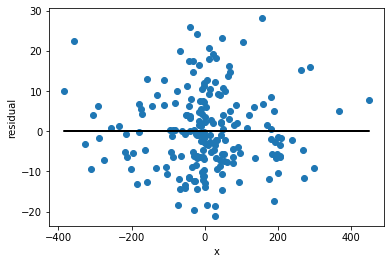

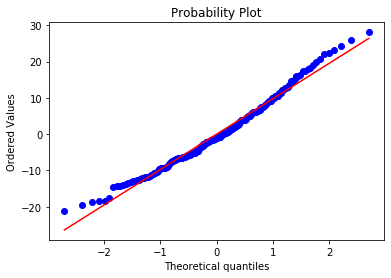

In [85]:
## Bonus (5%)
# plot residuals and probability plot of residuals for a normal distribution
y_res=y-y_pred
pylab.scatter(x, y_res)
pylab.plot(x,np.zeros(len(xx)),'k')

pylab.xlabel('x')
pylab.ylabel('residual')

plt.figure(2)

stats.probplot(y_res, dist="norm", plot=pylab)
pylab.show()